In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
fake = pd.read_csv("/content/Fake.csv")
true = pd.read_csv("/content/True.csv")

ParserError: Error tokenizing data. C error: EOF inside string starting at row 404

In [ ]:
fake = pd.read_csv("/content/Fake.csv")
true = pd.read_csv("/content/True.csv")

In [ ]:
import pandas as pd

# Load the CSV files into DataFrames
fake = pd.read_csv('/content/Fake.csv')
true = pd.read_csv('/content/True.csv')

# Now you can assign or manipulate the 'target' column if necessary
fake['target'] = '/content/Fake.csv'
true['target'] = '/content/True.csv'


In [ ]:

fake.shape

(23481, 5)

In [ ]:

true.shape


(21417, 5)

In [ ]:
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
data.head()

,title,text,subject,date,target
0,Kabul mosque attack: four-year-old called to s...,KABUL (Reuters) - A four-year-old boy photogra...,worldnews,"August 28, 2017",true
1,"Michelle Obama Poses In A Pretty Dress, So Ra...","Trump fans may have won the election, but they...",News,"November 12, 2016",fake
2,TRUMP’S NEW COMM DIRECTOR Puts CNN’s Chris Cuo...,Remember when the media used to think they con...,politics,"Jul 26, 2017",fake
3,The Latest Delusion From Devin Nunes Will Mak...,"Representative Devin Nunes, chairman of the Ho...",News,"March 29, 2017",fake
4,WATCH CRAZED LEFTIES PROTESTING TRUMP Shut Dow...,THIS IS SO IRONIC! CRAZED LEFTISTS with an ant...,left-news,"Apr 8, 2017",fake


In [ ]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Kabul mosque attack: four-year-old called to s...,KABUL (Reuters) - A four-year-old boy photogra...,worldnews,true
1,"Michelle Obama Poses In A Pretty Dress, So Ra...","Trump fans may have won the election, but they...",News,fake
2,TRUMP’S NEW COMM DIRECTOR Puts CNN’s Chris Cuo...,Remember when the media used to think they con...,politics,fake
3,The Latest Delusion From Devin Nunes Will Mak...,"Representative Devin Nunes, chairman of the Ho...",News,fake
4,WATCH CRAZED LEFTIES PROTESTING TRUMP Shut Dow...,THIS IS SO IRONIC! CRAZED LEFTISTS with an ant...,left-news,fake


In [ ]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,KABUL (Reuters) - A four-year-old boy photogra...,worldnews,true
1,"Trump fans may have won the election, but they...",News,fake
2,Remember when the media used to think they con...,politics,fake
3,"Representative Devin Nunes, chairman of the Ho...",News,fake
4,THIS IS SO IRONIC! CRAZED LEFTISTS with an ant...,left-news,fake


In [ ]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,kabul (reuters) - a four-year-old boy photogra...,worldnews,true
1,"trump fans may have won the election, but they...",News,fake
2,remember when the media used to think they con...,politics,fake
3,"representative devin nunes, chairman of the ho...",News,fake
4,this is so ironic! crazed leftists with an ant...,left-news,fake


In [ ]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
data.head()

,text,subject,target
0,kabul reuters a fouryearold boy photographed ...,worldnews,true
1,trump fans may have won the election but they ...,News,fake
2,remember when the media used to think they con...,politics,fake
3,representative devin nunes chairman of the hou...,News,fake
4,this is so ironic crazed leftists with an anti...,left-news,fake


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,text,subject,target
0,kabul reuters fouryearold boy photographed kab...,worldnews,true
1,trump fans may election taking break expressin...,News,fake
2,remember media used think controlled narrative...,politics,fake
3,representative devin nunes chairman house inte...,News,fake
4,ironic crazed leftists antitrump agenda hard t...,left-news,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


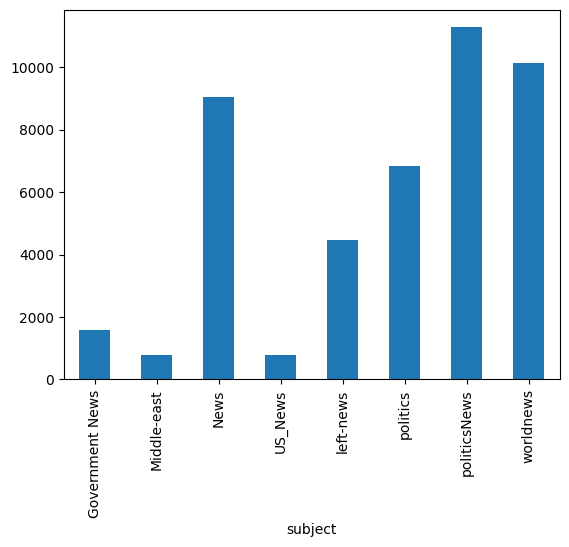

In [ ]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


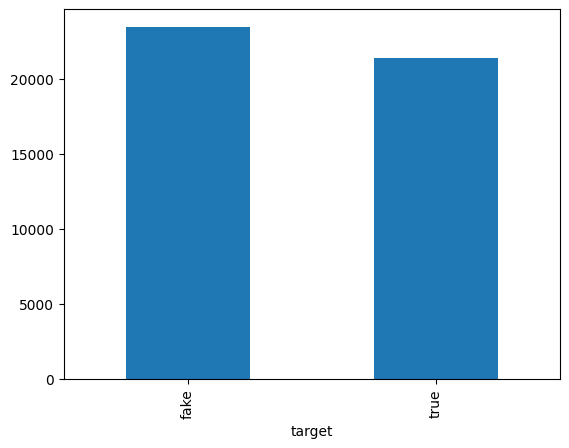

In [ ]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

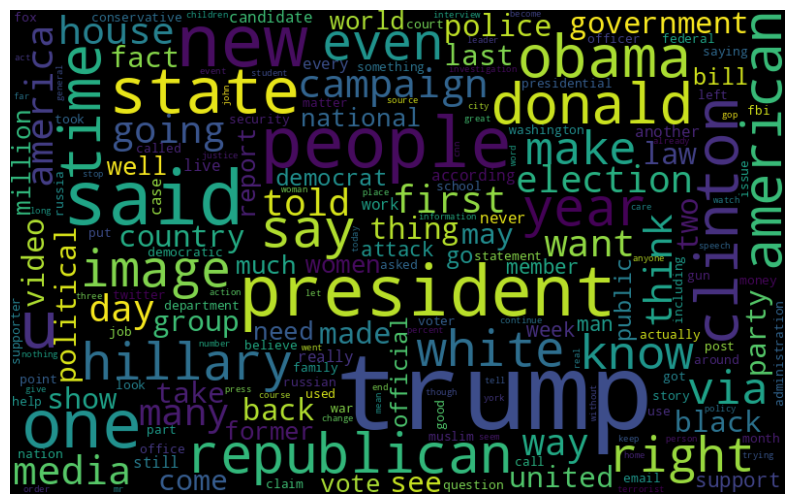

In [ ]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

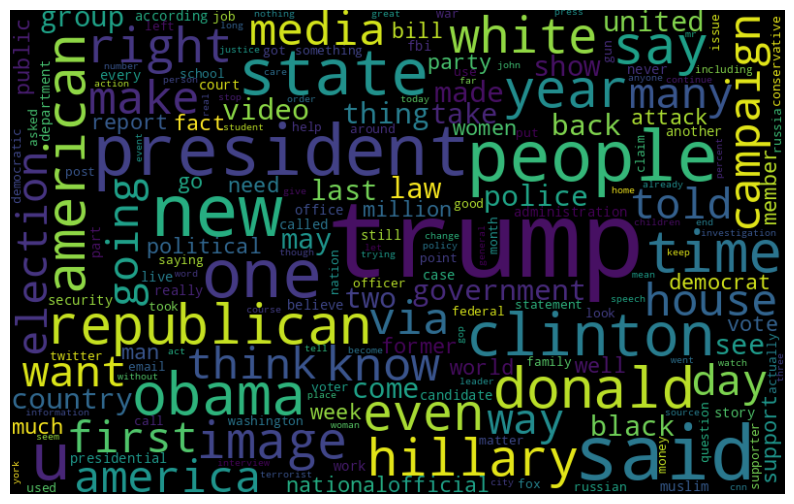

In [ ]:
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

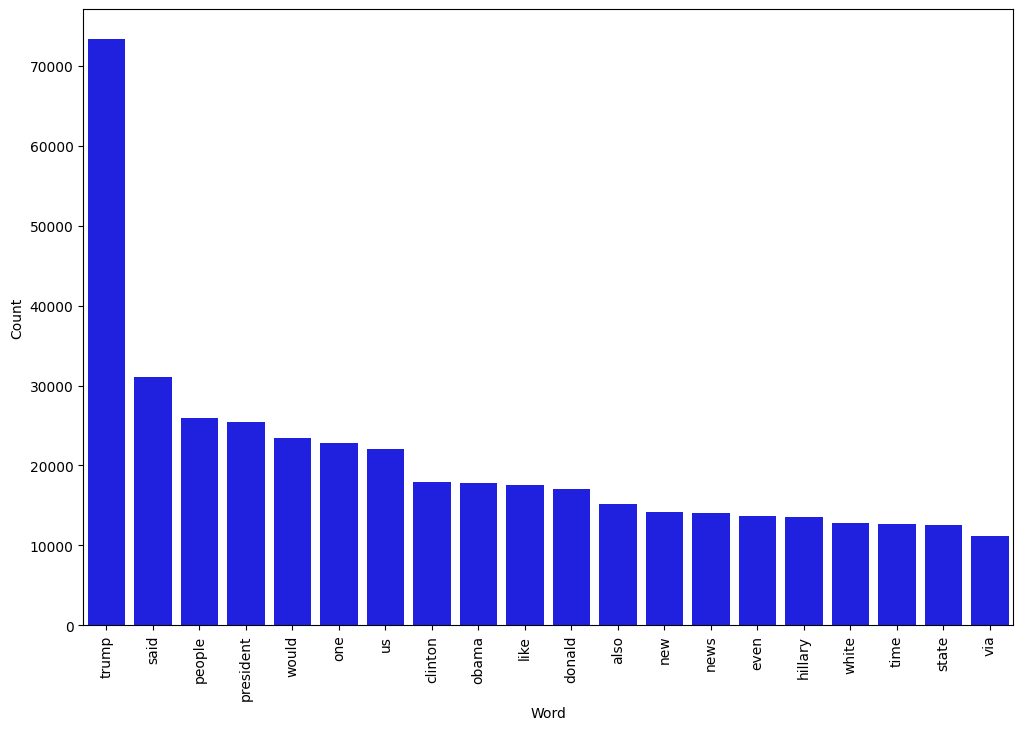

In [ ]:
counter(data[data["target"] == "fake"], "text", 20)

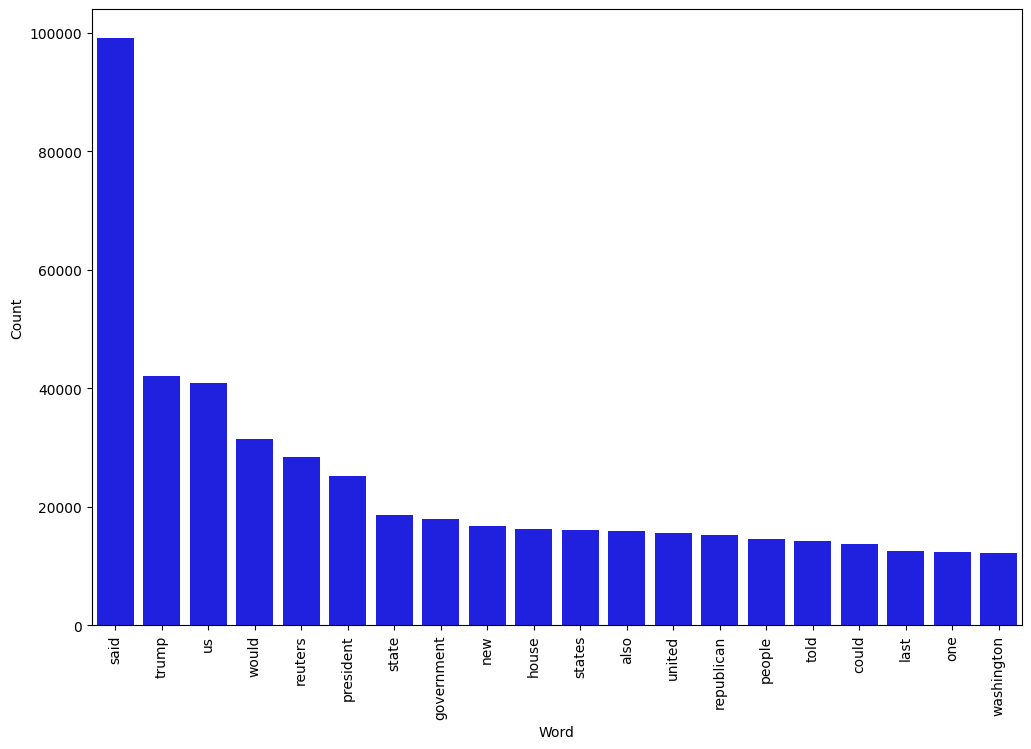

In [ ]:
counter(data[data["target"] == "true"], "text", 20)

In [ ]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [ ]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.07%


Confusion matrix, without normalization


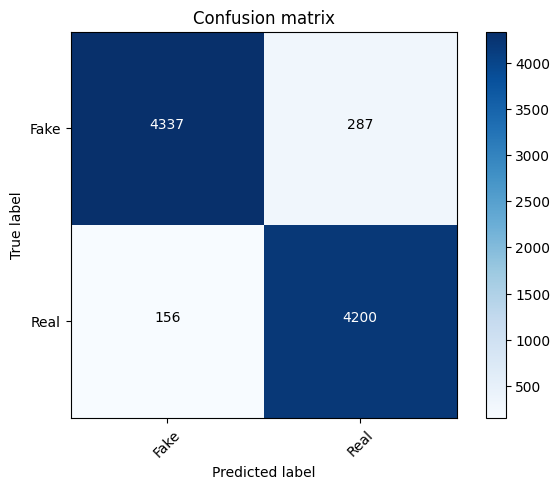

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.95%


Confusion matrix, without normalization


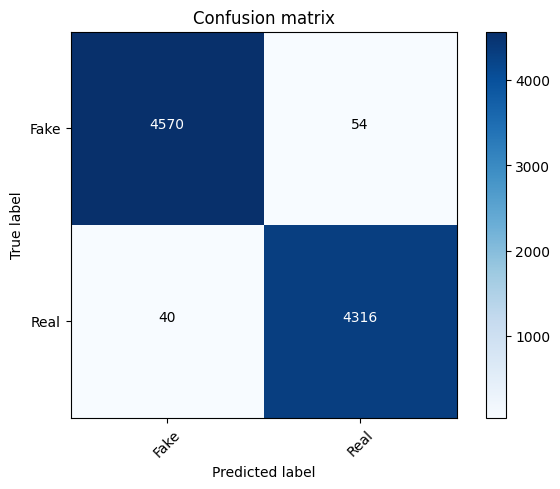

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.6%


Confusion matrix, without normalization


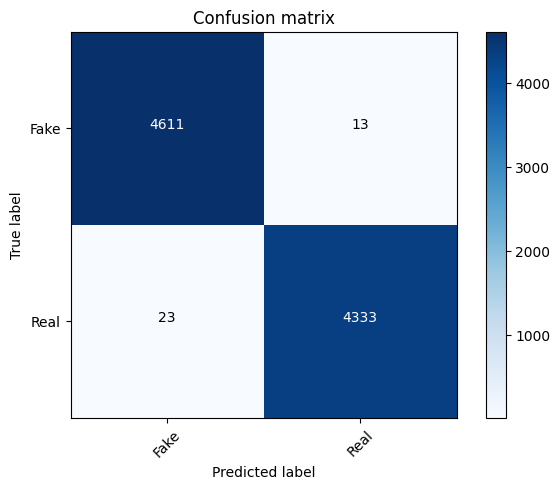

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.19%


Confusion matrix, without normalization


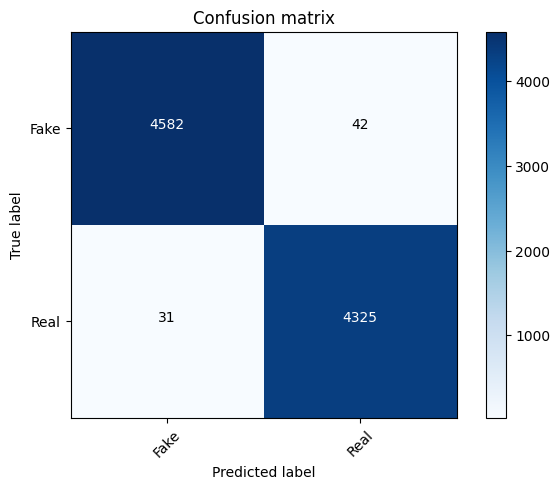

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

([<matplotlib.axis.YTick at 0x7a31f28528c0>,
 [Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

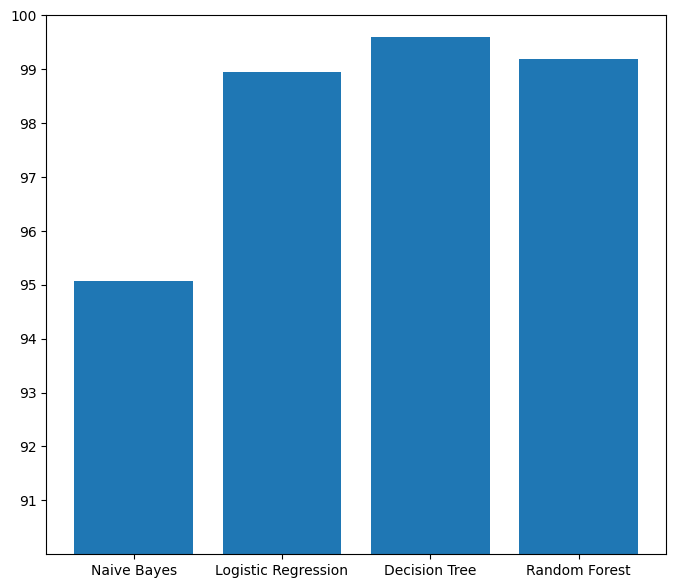

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

([<matplotlib.axis.YTick at 0x7a31e695f340>,
 [Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

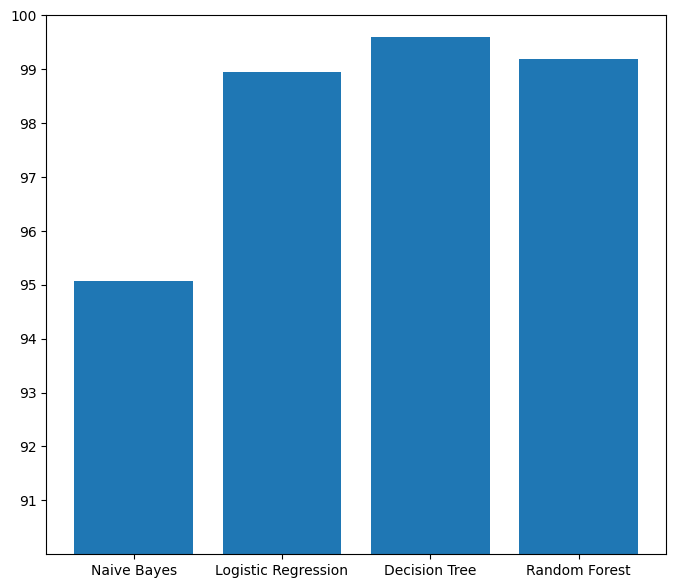

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups

# Load dataset
newsgroups = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'talk.religion.misc'], shuffle=True, random_state=42)

X = newsgroups.data
y = newsgroups.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the dictionary
dct = dict()

# Gradient Boosting classifier
GB_classifier = GradientBoostingClassifier()

# Pipeline for the Gradient Boosting model
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GB_classifier)])

# Fitting the Gradient Boosting model
model = pipe.fit(X_train, y_train)

# Predicting the test set
prediction = model.predict(X_test)

# Calculating and printing accuracy
gb_accuracy = round(accuracy_score(y_test, prediction) * 100, 2)
print("Gradient Boosting accuracy: {}%".format(gb_accuracy))

# Storing accuracy in the dictionary
dct['Gradient Boosting'] = gb_accuracy

# Display the dictionary with the accuracy
print("Model Accuracies:", dct)


Gradient Boosting accuracy: 89.74%
Model Accuracies: {'Gradient Boosting': 89.74}


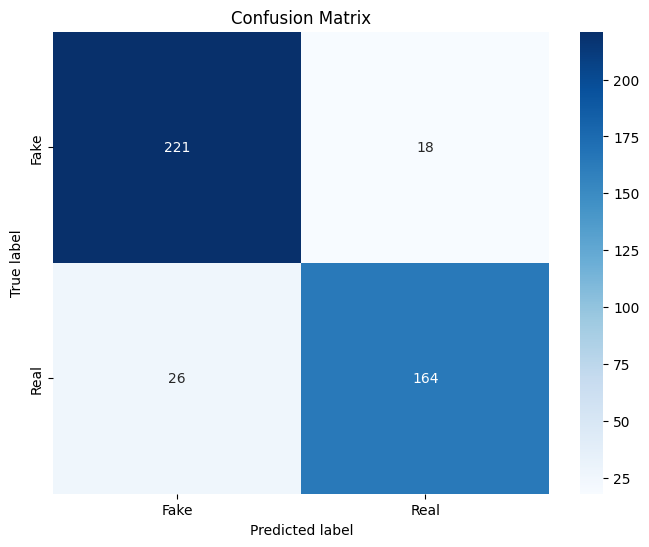

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, prediction)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


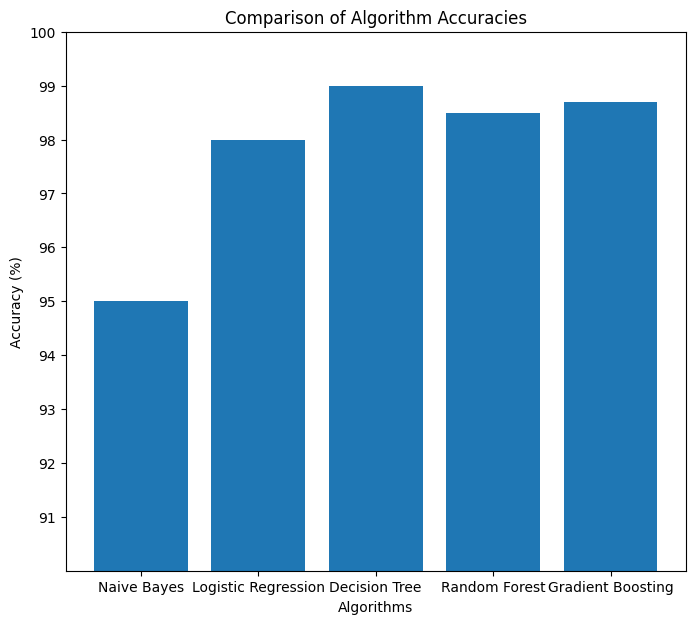

In [ ]:
import matplotlib.pyplot as plt

# Assuming these are the accuracies you have so far:
dct = {
    'Naive Bayes': 95.0,
    'Logistic Regression': 98.0,
    'Decision Tree': 99.0,
    'Random Forest': 98.5
}

# Add the Gradient Boosting accuracy (replace with the actual accuracy)
dct['Gradient Boosting'] = 98.7  # For example, adjust this value based on your Gradient Boosting accuracy

# Plotting the updated bar chart including Gradient Boosting
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()), list(dct.values()))
plt.ylim(90, 100)  # Adjusting y-axis limits for better visualization
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Algorithm Accuracies')

# Show the updated plot
plt.show()


In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 91.61%


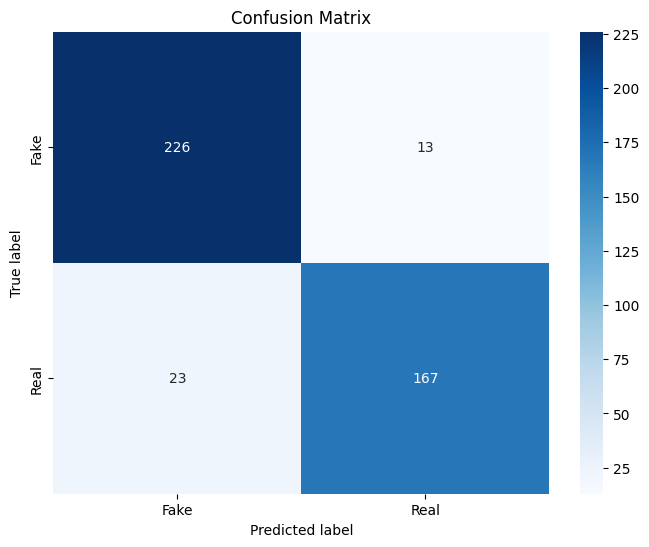

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score # Import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, prediction) # Use confusion_matrix directly

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

([<matplotlib.axis.YTick at 0x7889c356c880>,
 [Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

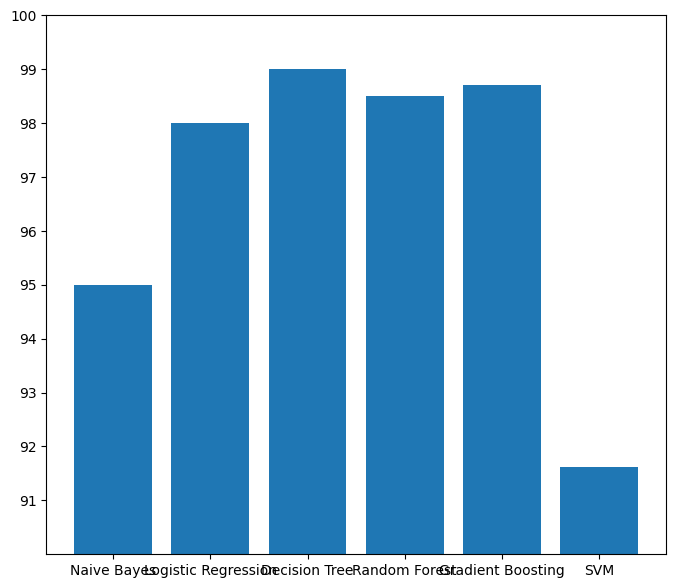

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

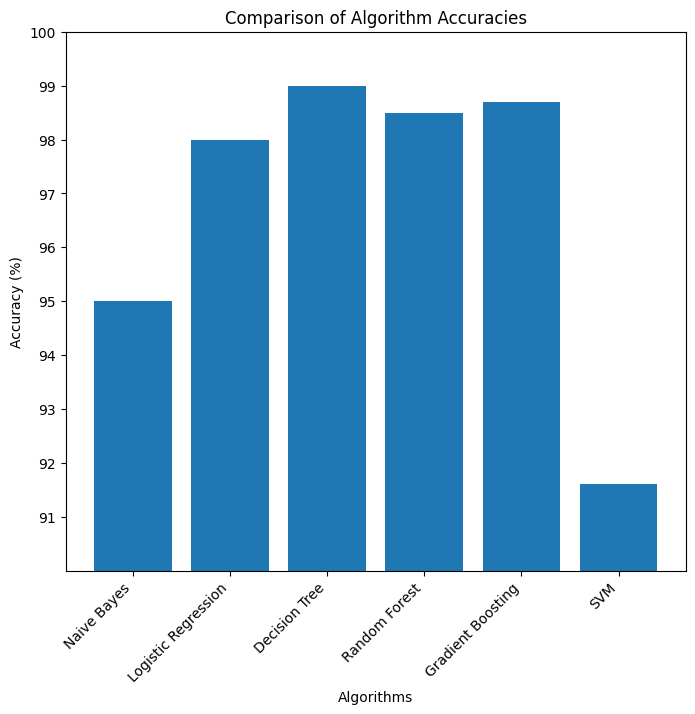

In [ ]:
import matplotlib.pyplot as plt

# Plotting the updated bar chart including Gradient Boosting and adjusting x-axis label rotation
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()), list(dct.values()))
plt.ylim(90, 100)  # Adjusting y-axis limits
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels by 45 degrees for better spacing
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Algorithm Accuracies')

# Show the updated plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
import nltk
from nltk.corpus import stopwords
import string
from itertools import combinations

# Load datasets
fake = pd.read_csv("/content/Fake.csv")
true = pd.read_csv("/content/True.csv")

# Add target labels
fake['target'] = 'fake'
true['target'] = 'true'

# Combine datasets and shuffle
data = pd.concat([fake, true]).reset_index(drop=True)
data = shuffle(data).reset_index(drop=True)

# Drop unnecessary columns
data.drop(['date', 'title'], axis=1, inplace=True)

# Preprocess text: lowercase and remove punctuation
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

# Download stopwords and remove them from text
nltk.download('stopwords')
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

# Split the data into train and test sets
X = data['text']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual models
nb_model = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('nb', MultinomialNB())])
lr_model = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('lr', LogisticRegression(max_iter=1000))])
dt_model = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=42))])
rf_model = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('rf', RandomForestClassifier(n_estimators=50, criterion='entropy'))])
svm_model = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('svm', SVC(kernel='linear'))])
gb_model = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('gb', GradientBoostingClassifier())])

# List of all models
models = [
    ('Naive Bayes', nb_model),
    ('Logistic Regression', lr_model),
    ('Decision Tree', dt_model),
    ('Random Forest', rf_model),
    ('SVM', svm_model),
    ('Gradient Boosting', gb_model)
]

# Generate all 3-model combinations
combinations_list = list(combinations(models, 3))

# Store best accuracy and best combination
best_accuracy = 0
best_combination = None

# Iterate through each combination and calculate accuracy
for combo in combinations_list:
    combo_list = list(combo)  # Convert tuple to list
    ensemble_model = VotingClassifier(estimators=combo_list, voting='hard')

    # Fit the ensemble model and predict
    ensemble_model.fit(X_train, y_train)
    y_pred = ensemble_model.predict(X_test)

    # Calculate accuracy
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    print(f"Combination: {[name for name, _ in combo_list]} - Accuracy: {accuracy}%")

    # Track the best combination
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_combination = combo_list

# Print the best combination and its accuracy
print(f"\nBest Combination: {[name for name, _ in best_combination]} - Accuracy: {best_accuracy}%")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Combination: ['Naive Bayes', 'Logistic Regression', 'Decision Tree'] - Accuracy: 99.06%
Combination: ['Naive Bayes', 'Logistic Regression', 'Random Forest'] - Accuracy: 98.72%
Combination: ['Naive Bayes', 'Logistic Regression', 'SVM'] - Accuracy: 98.96%
Combination: ['Naive Bayes', 'Logistic Regression', 'Gradient Boosting'] - Accuracy: 99.0%
Combination: ['Naive Bayes', 'Decision Tree', 'Random Forest'] - Accuracy: 99.24%
Combination: ['Naive Bayes', 'Decision Tree', 'SVM'] - Accuracy: 99.64%
Combination: ['Naive Bayes', 'Decision Tree', 'Gradient Boosting'] - Accuracy: 99.7%
Combination: ['Naive Bayes', 'Random Forest', 'SVM'] - Accuracy: 99.11%
Combination: ['Naive Bayes', 'Random Forest', 'Gradient Boosting'] - Accuracy: 99.01%
Combination: ['Naive Bayes', 'SVM', 'Gradient Boosting'] - Accuracy: 99.55%
Combination: ['Logistic Regression', 'Decision Tree', 'Random Forest'] - Accuracy: 99.47%
Combination: ['Logistic Regression', 'Decision Tree', 'SVM'] - Accuracy: 99.57%
Combination:

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
import nltk
from nltk.corpus import stopwords
import string
from itertools import combinations

# Load datasets
fake = pd.read_csv("/content/Fake.csv")
true = pd.read_csv("/content/True.csv")

# Add target labels
fake['target'] = 'fake'
true['target'] = 'true'

# Combine datasets and shuffle
data = pd.concat([fake, true]).reset_index(drop=True)
data = shuffle(data).reset_index(drop=True)

# Drop unnecessary columns
data.drop(['date', 'title'], axis=1, inplace=True)

# Preprocess text: lowercase and remove punctuation
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

# Download stopwords and remove them from text
nltk.download('stopwords')
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

# Split the data into train and test sets
X = data['text']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual models (with optimized settings)
nb_model = Pipeline([('vect', CountVectorizer(max_features=2000)),
                     ('tfidf', TfidfTransformer()),
                     ('nb', MultinomialNB())])

lr_model = Pipeline([('vect', CountVectorizer(max_features=2000)),
                     ('tfidf', TfidfTransformer()),
                     ('lr', LogisticRegression(max_iter=500, n_jobs=-1))])

dt_model = Pipeline([('vect', CountVectorizer(max_features=2000)),
                     ('tfidf', TfidfTransformer()),
                     ('dt', DecisionTreeClassifier(max_depth=10, random_state=42))])

rf_model = Pipeline([('vect', CountVectorizer(max_features=2000)),
                     ('tfidf', TfidfTransformer()),
                     ('rf', RandomForestClassifier(n_estimators=30, n_jobs=-1, random_state=42))])

svm_model = Pipeline([('vect', CountVectorizer(max_features=2000)),
                      ('tfidf', TfidfTransformer()),
                      ('svm', SVC(kernel='linear'))])

gb_model = Pipeline([('vect', CountVectorizer(max_features=2000)),
                     ('tfidf', TfidfTransformer()),
                     ('gb', GradientBoostingClassifier(n_estimators=30, random_state=42))])

# List of models to combine (optional: skip heavy models for faster run)
models = [
    ('Naive Bayes', nb_model),
    ('Logistic Regression', lr_model),
    ('Decision Tree', dt_model),
    ('Gradient Boosting', gb_model)
    # Uncomment if you want to include heavy models
    # ('Random Forest', rf_model),
    # ('SVM', svm_model)
]

# Generate a smaller subset of 3-model combinations (for faster testing)
combinations_list = list(combinations(models, 3))[:5]  # Use only first 5 combinations

# Store best accuracy and combination
best_accuracy = 0
best_combination = None

# Iterate through each combination and calculate accuracy
for combo in combinations_list:
    combo_list = list(combo)  # Convert tuple to list
    ensemble_model = VotingClassifier(estimators=combo_list, voting='hard', n_jobs=-1)

    # Fit the ensemble model and predict
    ensemble_model.fit(X_train, y_train)
    y_pred = ensemble_model.predict(X_test)

    # Calculate accuracy
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    print(f"Combination: {[name for name, _ in combo_list]} - Accuracy: {accuracy}%")

    # Track the best combination
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_combination = combo_list

# Print the best combination and its accuracy
print(f"\nBest Combination: {[name for name, _ in best_combination]} - Accuracy: {best_accuracy}%")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Combination: ['Naive Bayes', 'Logistic Regression', 'Decision Tree'] - Accuracy: 99.03%
Combination: ['Naive Bayes', 'Logistic Regression', 'Gradient Boosting'] - Accuracy: 99.04%
Combination: ['Naive Bayes', 'Decision Tree', 'Gradient Boosting'] - Accuracy: 99.51%
Combination: ['Logistic Regression', 'Decision Tree', 'Gradient Boosting'] - Accuracy: 99.54%

Best Combination: ['Logistic Regression', 'Decision Tree', 'Gradient Boosting'] - Accuracy: 99.54%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
import nltk
from nltk.corpus import stopwords
import string
from itertools import combinations

# Load datasets
fake = pd.read_csv("/content/Fake.csv")
true = pd.read_csv("/content/True.csv")

# Add target labels
fake['target'] = 'fake'
true['target'] = 'true'

# Combine datasets and shuffle
data = pd.concat([fake, true]).reset_index(drop=True)
data = shuffle(data).reset_index(drop=True)

# Drop unnecessary columns
data.drop(['date', 'title'], axis=1, inplace=True)

# Preprocess text: lowercase and remove punctuation
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

# Download stopwords and remove them from text
nltk.download('stopwords')
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

# Split the data into train and test sets
X = data['text']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual models (optimized settings)
nb_model = Pipeline([('vect', CountVectorizer(max_features=2000)),
                     ('tfidf', TfidfTransformer()),
                     ('nb', MultinomialNB())])

lr_model = Pipeline([('vect', CountVectorizer(max_features=2000)),
                     ('tfidf', TfidfTransformer()),
                     ('lr', LogisticRegression(max_iter=500, n_jobs=-1))])

dt_model = Pipeline([('vect', CountVectorizer(max_features=2000)),
                     ('tfidf', TfidfTransformer()),
                     ('dt', DecisionTreeClassifier(max_depth=10, random_state=42))])

gb_model = Pipeline([('vect', CountVectorizer(max_features=2000)),
                     ('tfidf', TfidfTransformer()),
                     ('gb', GradientBoostingClassifier(n_estimators=30, random_state=42))])

# List of models
models = [
    ('Naive Bayes', nb_model),
    ('Logistic Regression', lr_model),
    ('Decision Tree', dt_model),
    ('Gradient Boosting', gb_model)
]

# Step 1: Evaluate individual models and store their accuracies
individual_accuracies = {}
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    individual_accuracies[name] = accuracy
    print(f"{name} - Accuracy: {accuracy}%")

# Step 2: Create combinations and find the best ensemble accuracy
combinations_list = list(combinations(models, 3))[:5]  # Limit to first 5 combinations

best_accuracy = 0
best_combination = None

for combo in combinations_list:
    combo_list = list(combo)
    ensemble_model = VotingClassifier(estimators=combo_list, voting='hard', n_jobs=-1)

    # Fit the ensemble model
    ensemble_model.fit(X_train, y_train)
    y_pred = ensemble_model.predict(X_test)

    # Calculate accuracy
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    print(f"Combination: {[name for name, _ in combo_list]} - Accuracy: {accuracy}%")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_combination = combo_list

# Step 3: Print best combination and its accuracy
print(f"\nBest Ensemble Combination: {[name for name, _ in best_combination]} - Accuracy: {best_accuracy}%")

# Step 4: Identify the best individual model
best_model_name = max(individual_accuracies, key=individual_accuracies.get)
best_model_accuracy = individual_accuracies[best_model_name]

print(f"\nBest Individual Model: {best_model_name} - Accuracy: {best_model_accuracy}%")

# Step 5: Compare individual best with ensemble best
if best_model_accuracy > best_accuracy:
    print(f"\nThe best individual model ({best_model_name}) outperforms the best ensemble.")
else:
    print(f"\nThe best ensemble outperforms the individual models.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Naive Bayes - Accuracy: 94.33%
Logistic Regression - Accuracy: 98.9%
Decision Tree - Accuracy: 99.62%
Gradient Boosting - Accuracy: 99.53%
Combination: ['Naive Bayes', 'Logistic Regression', 'Decision Tree'] - Accuracy: 99.06%
Combination: ['Naive Bayes', 'Logistic Regression', 'Gradient Boosting'] - Accuracy: 99.02%
Combination: ['Naive Bayes', 'Decision Tree', 'Gradient Boosting'] - Accuracy: 99.67%
Combination: ['Logistic Regression', 'Decision Tree', 'Gradient Boosting'] - Accuracy: 99.67%

Best Ensemble Combination: ['Naive Bayes', 'Decision Tree', 'Gradient Boosting'] - Accuracy: 99.67%

Best Individual Model: Decision Tree - Accuracy: 99.62%

The best ensemble outperforms the individual models.
